# Графические возможности Pandas

In [4]:
import pandas as pd

tips = pd.read_csv("tips.csv")

Сколько строк содержится в датафрейме без учёта заголовка? Пример формата ответа: 150.

In [8]:
len(tips)

244

Напишите максимальную сумму счёта в датафрейме. Ответ введите с точностью до двух цифр после запятой, например:100.55.

In [7]:
tips.total_bill.max()

50.81

Метод plot

Для быстрого и корректного отображения графиков, которые мы будем строить, запустите  команду. Она позволит автоматически выводить на экран все графики и диаграммы без использования дополнительных функций.

In [9]:
%matplotlib inline

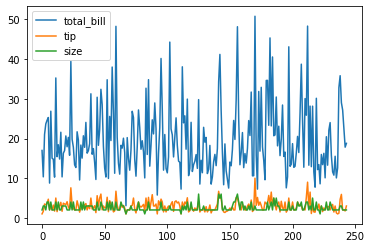

In [10]:
tips.plot()

Настройка параметров метода

Если применить метод plot не ко всему датафрейму, а только к одному столбцу, а в качестве одного из параметров указать тип диаграммы (например, тип hist), то мы получим гистограмму распределения признака:

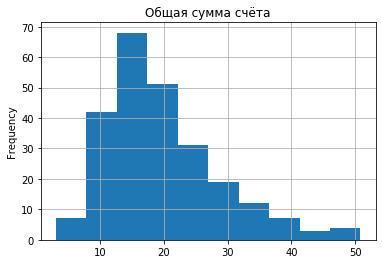

In [13]:
tips['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')

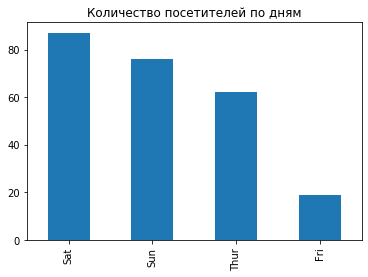

In [20]:
tips['day'].value_counts().plot(kind = 'bar', title = 'Количество посетителей по дням')

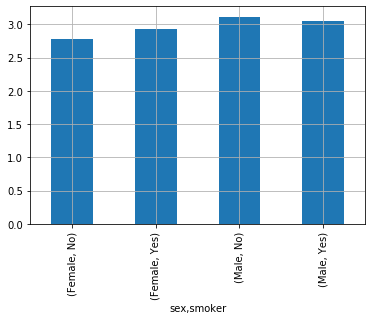

In [27]:
tips.groupby(by = ['sex', 'smoker'])['tip'].mean().plot(kind = 'bar', grid= True)

## Отображение двух показателей на графике

Метод plot позволяет использовать параметр subplots, который принимает логические значения True или False. При установке значения True можно разместить несколько графиков в одной рабочей области:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f01ee280b50>,
      dtype=object)

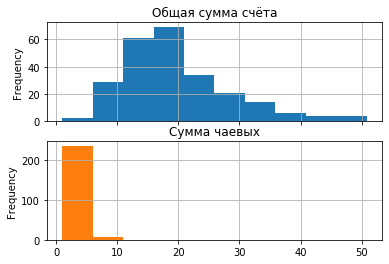

In [31]:
tips[['total_bill', 'tip']].plot(kind = 'hist', 
                               grid = True, 
                               subplots = True, 
                               title = ['Общая сумма счёта', 'Сумма чаевых'], 
                               legend = False)

Такой вариант отображения графиков показывает, в каких пределах изменяются оба признака, но ничего не говорит о том, есть ли какая-то связь между суммой по счёту и суммой чаевых. Для получения такой информации мы можем построить график типа scatter plot:

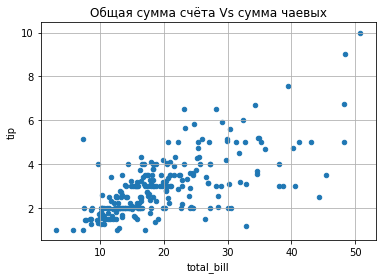

In [32]:
tips.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter', 
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

Если нам нужно совместить на графике несколько качественных и количественных показателей, то датафрейм следует предварительно обработать. Например, если мы хотим отобразить средние значения суммы счёта и размера чаевых по дням недели, то потребуется такой код:

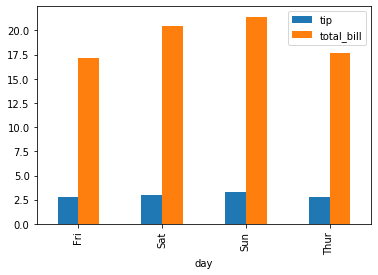

In [33]:
tips.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

## Объектно-ориентированный подход

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

Существует несколько подходов к созданию графиков в Matplotlib. Один из них — объектно-ориентированный подход, он наиболее прозрачный и мощный по функционалу. Процесс работы над графиком начинается с создания объекта, содержащего необходимую информацию и настройки. К этому объекту мы будем добавлять координатную плоскость и другие графические объекты.

В первой строке кода создаётся объект с именем fig, к которому применяются все настройки. Во второй строке создаётся координатная плоскость (axes), которая начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает отведённое место в области (ширина и высота равны 1):

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

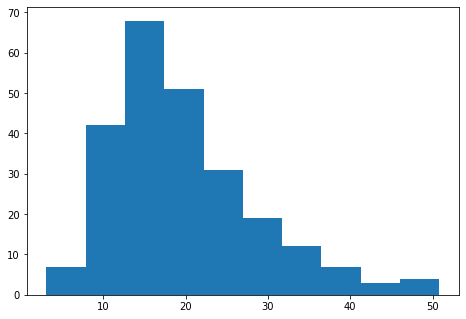

In [48]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(tips['total_bill'])

Теперь мы можем разместить в созданной нами координатной плоскости любую графическую информацию. Например, для построения гистограммы распределения признака «Общая сумма счёта» нам следует применить к axes метод hist:

In [47]:
axes.hist(tips['total_bill'])

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

Text(0, 0.5, 'Размер чаевых')

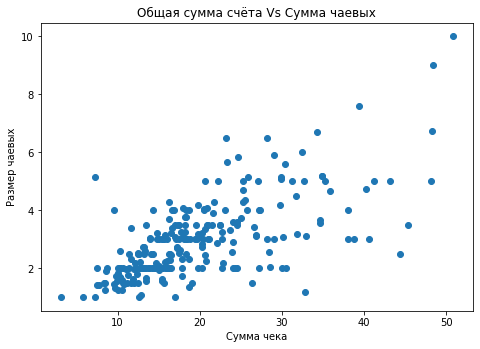

In [51]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = tips['total_bill'], y = tips['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

### Несколько систем координат

Мы можем размещать несколько систем координат на одном объекте, что позволит нам отображать вспомогательную информацию на основном графике. Для добавления второй системы координат необходимо повторно применить к объекту fig метод set_axes, указав новое имя для второй системы координат.

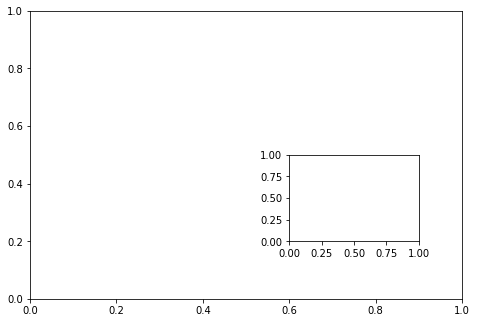

In [74]:
fig = plt.figure()
fig.add_axes([0,0,1,1])
fig.add_axes([0.6, 0.2, 0.3, 0.3])

### Создание вспомогательного графика

In [76]:
tips_per_day = tips.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()
tips_per_day

,day,min,max
0,Fri,5.75,40.17
1,Sat,3.07,50.81
2,Sun,7.25,48.17
3,Thur,7.51,43.11


<BarContainer object of 4 artists>

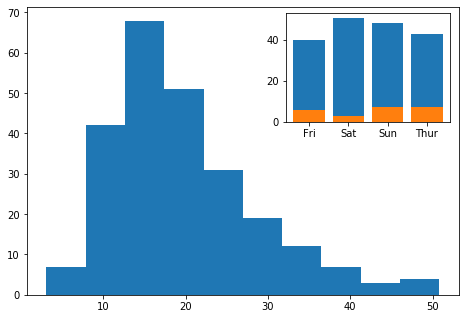

In [78]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(tips['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'])

Недостатком графика является то, что на вспомогательной диаграмме столбцы перекрывают друг друга, из-за чего появляется риск потерять часть информации. Для решения этой проблемы поработаем с настройками метода bar:

<BarContainer object of 4 artists>

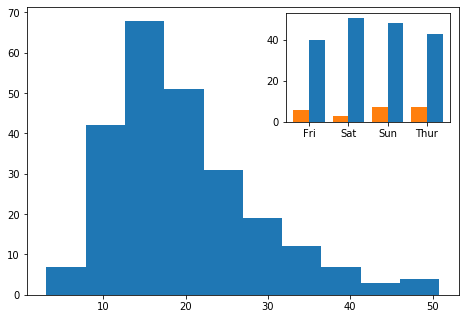

In [80]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(tips['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], 
                width = 0.4, align = 'edge')
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], 
                width = -0.4, align = 'edge')

## Добавление легенды

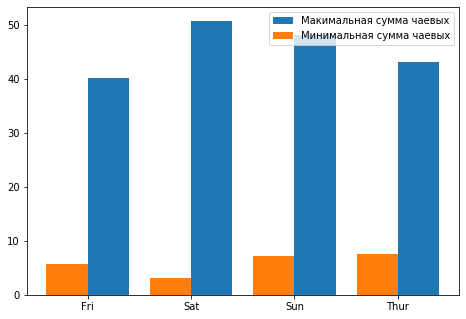

In [90]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x=tips_per_day['day'], height = tips_per_day['max'], width = 0.4, align = 'edge', label="Макимальная сумма чаевых")
axes.bar(x=tips_per_day['day'], height = tips_per_day['min'], width = -0.4, align = 'edge', label="Минимальная сумма чаевых")

axes.legend(loc = 1)

Для того, чтобы легенда не перекрывала часть данных, увеличиваем максимальное значение оси ординат с помощью метода set_ylim к объекту axes:

(0, 60)

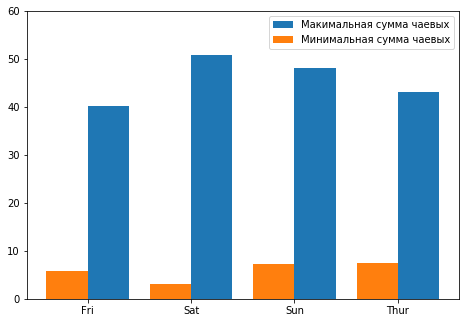

In [94]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x=tips_per_day['day'], height = tips_per_day['max'], width = 0.4, align = 'edge', label="Макимальная сумма чаевых")
axes.bar(x=tips_per_day['day'], height = tips_per_day['min'], width = -0.4, align = 'edge', label="Минимальная сумма чаевых")

axes.legend(loc = 1)

axes.set_ylim(0, 60)

### Subplots

Разместить в одном пространстве несколько графиков можно и с помощью метода subplots. В параметрах фигуры необходимо указать количество строк и столбцов, в которых будут размещаться графики. При желании можно задать размер фигуры в дюймах (ширина*высота):

Text(0.5, 1.0, 'Общая сумма счета VS Общая сумма чаевых')

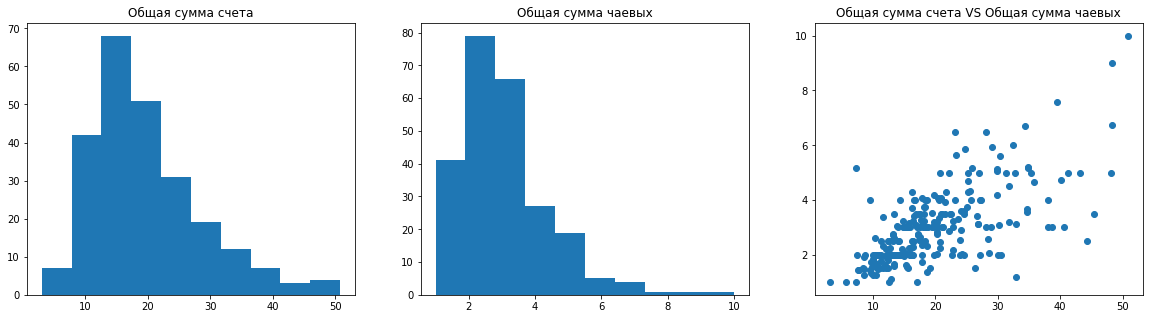

In [113]:
fig, axas = plt.subplots(1, 3, figsize = (20, 5))
axas[0].hist(tips['total_bill'])
axas[0].set_title("Общая сумма счета")

axas[1].hist(tips['tip'])
axas[1].set_title("Общая сумма чаевых")

axas[2].scatter(x = tips['total_bill'], y = tips['tip'])
axas[2].set_title("Общая сумма счета VS Общая сумма чаевых")

Text(0.5, 1.0, 'Общая сумма счета')

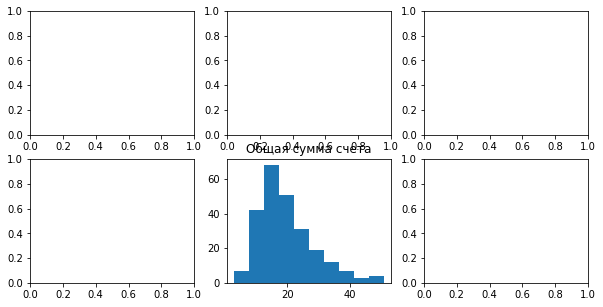

In [119]:
fig, axas = plt.subplots(2, 3, figsize = (10, 5))

axas[1][1].hist(tips['total_bill'])
axas[1][1].set_title("Общая сумма счета")


## Создание линейных графиков

Для выполнения заданий этого блока мы будем использовать не датасет, а специально сгенерированный одномерный массив NumPy. Для генерации массива нам необходимо импортировать библиотеку NumPy:

In [1]:
import numpy as np 

Теперь сгенерируем массив из 1000 чисел, равномерно распределённых в интервале от -3 до 3. Также создадим переменную, содержащую значения функции e^x на отрезке [-3, 3]:

In [4]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)

array([ 0.04978707,  0.05008699,  0.05038872,  0.05069226,  0.05099764,
        0.05130485,  0.05161392,  0.05192484,  0.05223764,  0.05255232,
        0.0528689 ,  0.05318739,  0.0535078 ,  0.05383013,  0.05415441,
        0.05448064,  0.05480883,  0.05513901,  0.05547117,  0.05580533,
        0.05614151,  0.05647971,  0.05681995,  0.05716223,  0.05750658,
        0.05785301,  0.05820152,  0.05855213,  0.05890485,  0.0592597 ,
        0.05961668,  0.05997582,  0.06033712,  0.06070059,  0.06106626,
        0.06143413,  0.06180421,  0.06217652,  0.06255108,  0.06292789,
        0.06330698,  0.06368834,  0.06407201,  0.06445798,  0.06484628,
        0.06523692,  0.06562991,  0.06602527,  0.06642301,  0.06682315,
        0.0672257 ,  0.06763067,  0.06803808,  0.06844795,  0.06886029,
        0.06927511,  0.06969242,  0.07011226,  0.07053462,  0.07095952,
        0.07138699,  0.07181703,  0.07224966,  0.0726849 ,  0.07312276,
        0.07356326,  0.07400641,  0.07445223,  0.07490073,  0.07

### Отрисовка одной кривой

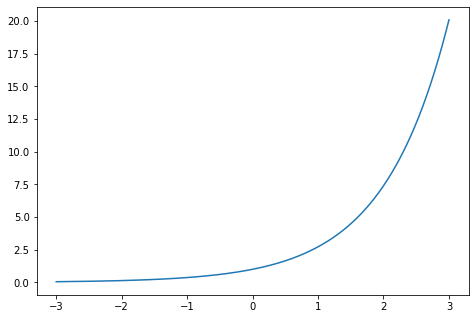

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1) 

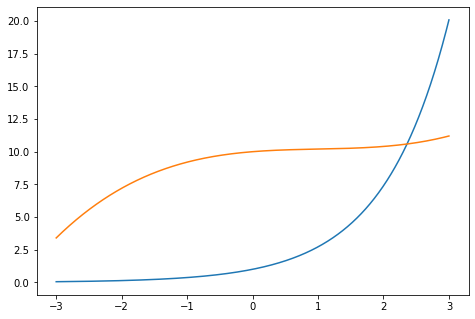

In [9]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

axes.plot(x, y1) 
axes.plot(x, y2)

### Стили линий

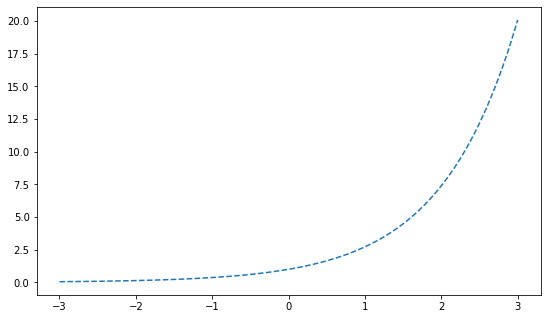

In [10]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1, linestyle='--')

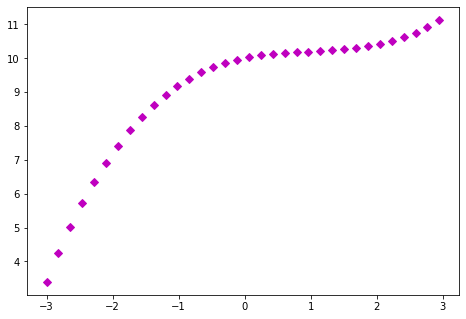

In [13]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[::30], y2[::30], 'mD')

## Гистограммы распределения признаков

Seaborn — графическая библиотека с большими функциональными возможностями, позволяющая создавать разные типы графиков и использовать расширенные настройки при оформлении. Многие функции Seaborn интегрируются с библиотекой Matplotlib, что создает дополнительные возможности для творчества при визуализации данных.

Импортируем библиотеки Seaborn, Matplotlib и Pandas для работы с датафреймами и корректного отображения информации в jupyter notebook:

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

При использовании некоторых методов Seaborn система может выдавать предупреждающие сообщения, что метод применяется к определенному типу данных. Эти предупреждения не являются сообщениями об ошибках, их можно игнорировать и отключить выведение на экран:

In [18]:
import warnings; warnings.simplefilter('ignore')

In [19]:
df = pd.read_csv('tips.csv')

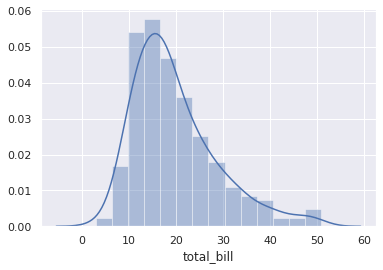

In [22]:
sns.set()
sns.distplot(df['total_bill'])

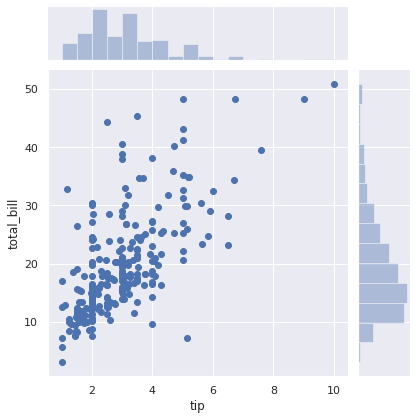

In [25]:
sns.jointplot(x = 'tip', y = 'total_bill', data = df)

Характер представления информации в центральной части графика можно регулировать с помощью параметра kind. Например, kind = 'reg' выводит на экран не только точки, представляющие данные об отдельных посещениях ресторана, но и линию регрессии, выражающую общий характер связи между двумя величинами:

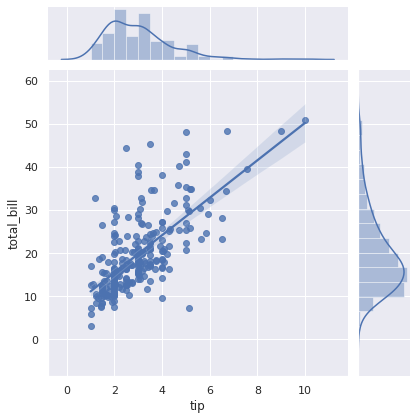

In [26]:
sns.jointplot(x = 'tip', y = 'total_bill', data = df, kind='reg')

Другой быстрый и наглядный способ отобразить гистограммы распределения количественных признаков и особенности связей между ними — построить график типа pairplot:

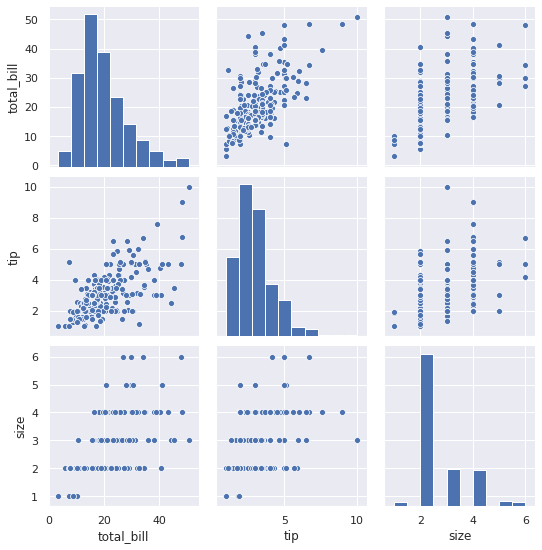

In [27]:
sns.pairplot(df)

## Работа с категориальными признаками

Для отображения информации о качественных признаках на диаграммах по методам библиотек Pandas и Matplotlib приходится предварительно обрабатывать датафрейм, группируя нужные данные. В Seaborn такой проблемы нет: при построении графиков можно обращаться к столбцам с категориальными признаками напрямую. Для построения гистограммы распределения категориального признака можно воспользоваться методом countplot:

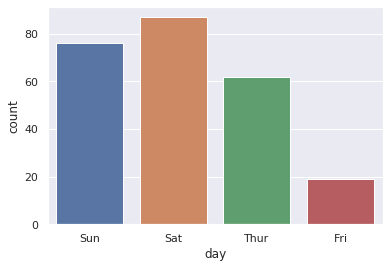

In [28]:
sns.countplot(x = 'day', data = df)

Категориальные значения при построении графиков можно использовать в качестве одного из параметров метода barplot. Он позволяет разделить датафрейм на группы в зависимости от значения категориальной переменной. По умолчанию для каждой группы вычисляется среднее значение заданной количественной переменной. Вместо среднего значения можно вычислить и любую другую статистическую характеристику, наименование которой задается в параметре estimator.

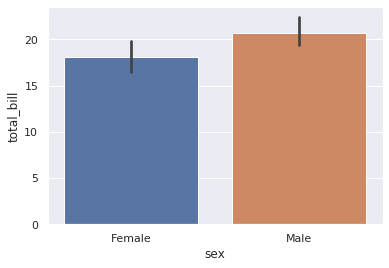

In [29]:
sns.barplot(x = 'sex', y = 'total_bill', data = df)

### Boxplots

Box plot — тип графика, компонентами которого являются:

- Отрезок (Range), отражающий диапазон значений набора данных.
- Прямоугольник (Box), который отображает границы основного объема данных. Левой границей считается значение 25%-ый квантиля, или Q1, первый квартал. Правой границей является 75%-ый квантиль, или Q3, третий квартал.
- Усы (whiskers) — отметки на оси, представляющие левый и правый «крайние» значения данных. Фактически эти значения не всегда являются минимумом или максимумом набора. Они представляют значения, отстоящие на 1.5*IQR влево или вправо от левой (Q1) или правой (Q2) границы соответственно. Здесь IQR - Interquartile Range (межквантильный диапазон) — ширина прямоугольника от Q1 до Q3.
- Выбросы (Outliers) — значения, находящиеся за левым и правым «крайними» значениями на оси.


<img src="m7.10_3.png" />

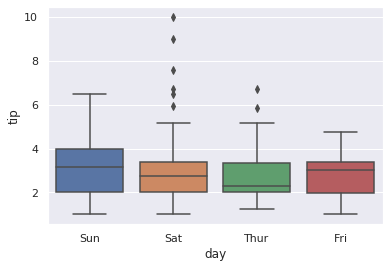

In [31]:
sns.boxplot(x = 'day', y = 'tip', data = df)

Ещё один способ увеличения информативности методов Seaborn — использование параметра hue. Он позволяет дополнительно разделять отображаемые данные в зависимости от значения нового категориального признака. Посмотрите, как меняется отображение boxplot при добавлении параметра hue:

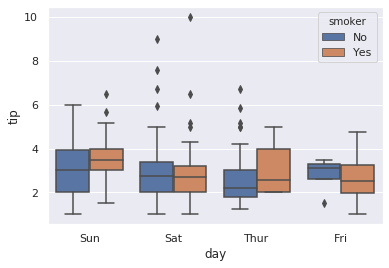

In [33]:
sns.boxplot(x = 'day', y = 'tip', data = df, hue = 'smoker')

## Графики табличного типа

Степень связи между двумя величинами в Seaborn помогает оценить корреляционный анализ. Величина степени связи (коэффициент корреляции) может меняться от -1 до +1: чем ближе абсолютное значение коэффициента к единице, тем сильнее связь между признаками.

Для отображения информации о результатах корреляционного анализа в Seaborn часто используются тепловые карты (heatmap).  Рассмотрим, как создать такую карту. Сначала вычислим коэффициенты корреляции между количественными признаками, содержащимися в датафрейме, с помощью метода corr(). Результат вычислений сохраним в новом датафрейме correlation:

In [41]:
correlation = df.corr()
display(correlation)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Теперь мы можем передать созданный датафрейм с коэффициентами в качестве одного из параметров метода heatmap. Для отображения в тепловой карте значений коэффициентов корреляции зададим параметр annot = True. Для использования более ярких цветов при заливке ячеек применяем цветовую палитру coolwarm (параметр cmap):

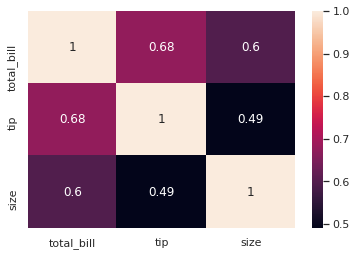

In [43]:
sns.heatmap(correlation, annot = True)

Опираясь на результаты корреляционного анализа датафрейма tips.scv, укажите пару признаков, между которыми выявлена самая тесная связь.

## Библиотека Plotly

Библиотека Plotly не входит в стандартный набор модулей Anaconda, поэтому ее следует установить. Это можно сделать с помощью менеджера пакетов pip, который запускается из командной строки или напрямую из jupyter notebook. В случае запуска менеджера пакетов из ячейки jupyter notebook перед текстом команды нужно добавить восклицательный знак.



In [1]:
!pip install plotly
!pip install cufflinks

     |████████████████████████████████| 11.5 MB 6.6 MB/s eta 0:00:01    |█▎                              | 471 kB 1.5 MB/s eta 0:00:08     |█▉                              | 655 kB 1.5 MB/s eta 0:00:08     |██████████████████████▋         | 8.1 MB 9.7 MB/s eta 0:00:01     |████████████████████████▊       | 8.9 MB 9.7 MB/s eta 0:00:01     |███████████████████████████▏    | 9.8 MB 9.7 MB/s eta 0:00:01     |███████████████████████████████▌| 11.3 MB 6.6 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=86c817c223c4d57d63fab872c70088507af8df81229e930c8e39877bae8198f6
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
     |████████████████████████████████| 81 kB 1.4 MB/s eta 0:00:011


  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67921 sha256=28d138e0051d9d69a718a07d07dfad1d8d202516e63dafff9660fb3d63d5a8e6
  Stored in directory: /root/.cache/pip/wheels/e1/27/13/3fe67fa7ea7be444b831d117220b3b586b872c9acd4df480d0
Successfully built cufflinks


### Основные типы графиков в Plotly

Перед созданием интерактивных визуализаций импортируйте необходимые библиотеки:

In [2]:
import pandas as pd
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

Для работы с библиотекой Plotly в режиме оффлайн включите этот режим:

In [4]:
init_notebook_mode(connected = True)
cf.go_offline()

In [5]:
df = pd.read_csv('tips.csv')

Для создания разных типов графиков в Pandas используется метод plot с различными настройками:

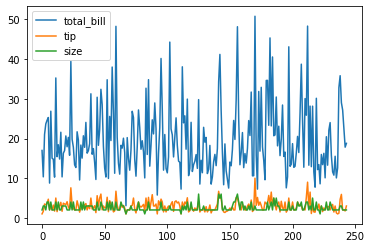

In [6]:
df.plot()

Для превращения графика в интерактивную визуализацию достаточно добавить в код всего одну букву:

In [7]:
df.iplot()

Как и при работе с методом plot в библиотеке Pandas, при изменении параметров метода iplot можно изменять тип и другие особенности диаграммы. Plotly позволяет создавать новые виды графиков. Например, этот тип графика позволяет не только показать на одной координатной плоскости сумму чека и размер чаевых для каждого заказа, но и демонстрирует, как изменяется разность между этими двумя суммами для разных заказов:

In [10]:
df[['total_bill', 'tip']].iplot(kind='spread')

/opt/conda/lib/python3.7/site-packages/cufflinks/plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



Bubblechart — разновидность диаграммы рассеяния (scatterplot), в которой используются три параметра. Третий параметр влияет на размер маркера, который показывает связь между значениями переменных, отложенных на оси абсцисс и оси ординат:

In [13]:
df.iplot(kind='bubble', x = 'total_bill', y = 'size', size = 'tip')

In [14]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
